# Count rate analysis for trapped electrons
By Andrei R. Hanu - <andrei.hanu@nasa.gov>

## Introduction

We can estimate the expected count rate (number of particled per unit time) recorded by the CNP-TEPC instrument by integrating the energy dependent geometric factor and an assumed energy depended differential flux. In this approach, the count rates may be expressed as:


In [285]:
# Matplotlib - 2D plotting library
from matplotlib import pyplot as plt
from matplotlib import rcParams

# Show matplotlib figures inline the notebook
%matplotlib inline

# Pandas - High-performance data analysis
import pandas

# Glob - Unix style pathname pattern expansion
# Used to aggregate folders and files into a single list so they can be iterated over
import glob

# Numpy - For handling of large, multi-dimensional arrays and matrices
import numpy as np

# Divide integers
from __future__ import division

# Scipy - For accurate integration
from scipy.integrate import simps, trapz
from scipy.interpolate import interp1d

##########################################################################################
# Setting rcParams for publication quality graphs
fig_width_pt = 246.0                    # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # Width in inches
fig_height = fig_width*golden_mean      # Height in inches
fig_size =  [fig_width, fig_height]
# fig_size =  [7.3,4.2]
fig_size =  [7.3*1.25,4.2*1.25]
# fig_size =  [7.3*1.5,4.2*1.5]
# fig_size =  [7.3*2,4.2*2]
params = {'backend': 'pdf',
        'axes.labelsize': 10,
        'legend.fontsize': 9,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'xtick.major.size': 6,
        'xtick.major.width': 1,
        'xtick.minor.size': 2.5,
        'xtick.minor.width': 1,
        'ytick.major.size': 6,
        'ytick.major.width': 1,
        'ytick.minor.size': 2.5,
        'ytick.minor.width': 1,
        'font.family': 'sans-serif',
        'font.sans-serif': 'Avant Garde',
        'font.size': 10,
        'text.usetex': True,
        'figure.figsize': fig_size}

# Update rcParams
rcParams.update(params)

In [286]:
# Folder & file containing the calculated geometric factors (Simulation)
DataFolder = '../Results/Scint_4mm_PV_1mm_Lid_1mm/Electrons/'
DataFilename = 'Geometric_Factor_Electrons.csv'

# Readout CSV file
try:
    DataGF = pandas.read_csv(DataFolder+DataFilename,skiprows=1,index_col=0,
                            engine='python', 
                            names=('Energy (keV)',
                                   'GF Total (cm^2 sr)',
                                   'GF Total (cm^2 sr) Error',
                                   'GF Coinc (cm^2 sr)',
                                   'GF Coinc (cm^2 sr) Error',
                                   'GF Anti-Coinc (cm^2 sr)',
                                   'GF Anti-Coinc (cm^2 sr) Error'))

except:
    print "Cannot find or read file",DataFilename,"containing the geometric factors."
    
print DataGF

              GF Total (cm^2 sr)  GF Total (cm^2 sr) Error  \
Energy (keV)                                                 
1000                    0.001660                  0.000063   
1125                    0.002215                  0.000072   
1266                    0.003203                  0.000087   
1425                    0.004268                  0.000101   
1603                    0.005800                  0.000117   
1804                    0.008133                  0.000139   
2030                    0.099314                  0.000485   
2285                    1.013280                  0.001550   
2571                    3.373304                  0.003344   
2894                    6.704013                  0.011048   
3257                   12.908915                  0.062116   
3665                   27.166497                  0.185029   
4124                   47.974551                  0.247464   
4641                   70.302916                  0.282981   
5223    

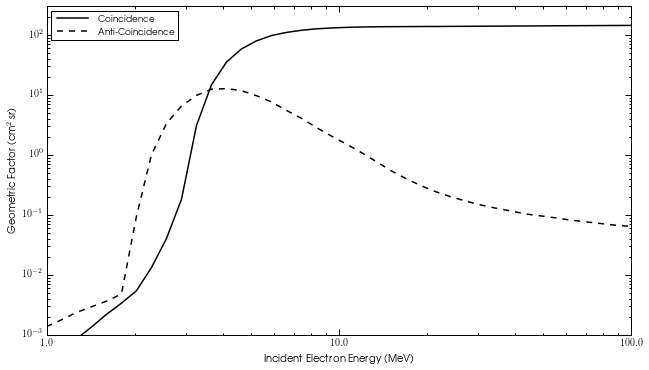

In [287]:
##########################################################################################
# Plot the Geometry Factor over a range of particle energies
figG, axG = plt.subplots(1,1)

plt.loglog(DataGF.index/1000., DataGF['GF Coinc (cm^2 sr)'], 'k-', linewidth=1.5, label="Coincidence")
plt.loglog(DataGF.index/1000., DataGF['GF Anti-Coinc (cm^2 sr)'], 'k--', linewidth=1.5, label="Anti-Coincidence")

# Figure Properties
axG.set_ylabel(r'Geometric Factor (cm$^2$ sr)')  
axG.set_xlabel('Incident Electron Energy (MeV)') 
axG.set_ylim(0.001, 300.)
axG.set_xlim(1E0, 1E2)

from matplotlib.ticker import ScalarFormatter
axG.xaxis.set_major_formatter(ScalarFormatter())

axG.legend(loc='upper left',handlelength=4)

# Tight Layout
plt.tight_layout()

# Show the figure
plt.show(figG)

In [288]:
# Filename containing SPENVIS particle flux information
SPENVISDataFolder = '../Results/Scint_4mm_PV_1mm_Lid_1mm/'
SPENVISDataFilename = 'SPENVIS_500km_SSO_Trapped_Electron_Proton.txt'

# Readout the SPENVIS file
try:
    DataSPENVIS = pandas.read_csv(SPENVISDataFolder+SPENVISDataFilename, skiprows=182, skipfooter=1, index_col=0,
                                  engine='python', 
                                  names=('Energy (MeV)',
                                         'IFlux (cm^-2 s^-1)',
                                         'DFlux (cm^-2 s^-1 MeV^-1)'))
except:
    print "Cannot find or read file",SPENVISDataFilename,"containing the SPENVIS electron flux information."
    
# Scale the 
DataSPENVIS.index *= 1E3

print DataSPENVIS

              IFlux (cm^-2 s^-1)  DFlux (cm^-2 s^-1 MeV^-1)
Energy (MeV)                                               
40                  2834600.0000              40398000.0000
100                 1008600.0000              20469000.0000
200                  622500.0000               2773300.0000
300                  453920.0000               1261300.0000
400                  370230.0000                751740.0000
500                  303570.0000                554200.0000
600                  259390.0000                408450.0000
700                  221880.0000                329260.0000
800                  193540.0000                256550.0000
1000                 152980.0000                185400.0000
1250                 112070.0000                146140.0000
1500                  79915.0000                113810.0000
1750                  55163.0000                 85025.0000
2000                  37402.0000                 59855.0000
2250                  25236.0000        

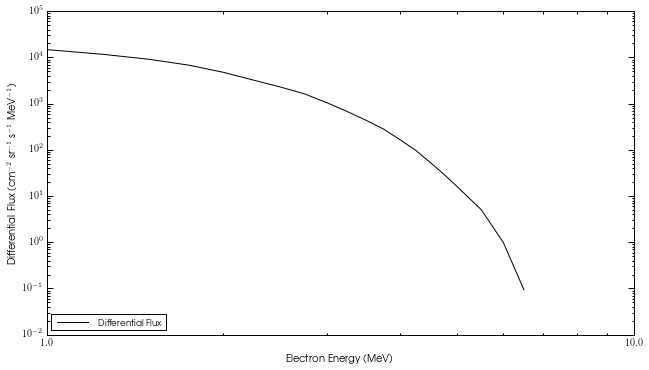

In [289]:
##########################################################################################
# Plot the SPENVIS fluxes
figFlux, axFlux = plt.subplots(1,1)

plt.loglog(DataSPENVIS.index/1E3, DataSPENVIS['DFlux (cm^-2 s^-1 MeV^-1)']/(4*np.pi), 'k-', linewidth=1., label="Differential Flux")

# Figure Properties
axFlux.set_ylabel('Differential Flux (cm$^{-2}$ sr$^{-1}$ s$^{-1}$ MeV$^{-1}$)')  
axFlux.set_xlabel('Electron Energy (MeV)') 
axFlux.set_ylim(1E-2, 1E5)
axFlux.set_xlim(1E0, 1E1)

from matplotlib.ticker import ScalarFormatter
axFlux.xaxis.set_major_formatter(ScalarFormatter())

axFlux.legend(loc='lower left',handlelength=4)

# Tight Layout
plt.tight_layout()

# Show the figure
plt.show(figFlux)

In [290]:
##########################################################################################
# Calculate the differential count rate
DCount = pandas.DataFrame(index = DataGF.index.values,
                          columns = ('DCount Coinc (s^-1 MeV^-1)', 
                                     'DCount Coinc (s^-1 MeV^-1) Error',
                                     'DCount Anti-Coinc (s^-1 MeV^-1)', 
                                     'DCount Anti-Coinc (s^-1 MeV^-1) Error'))

# Loop through the geometric factors and interpolate the flux as necessary
for index, row in DataGF.iterrows():
    # Linearly interpolate the flux
    flux = interp1d(DataSPENVIS.index.values, DataSPENVIS['DFlux (cm^-2 s^-1 MeV^-1)'].values,
                    bounds_error=False,
                    fill_value=0.)
        
    # Calculate the differential count rates
    DCount_COINC = flux(index)*DataGF.loc[index]['GF Coinc (cm^2 sr)']/(4*np.pi)
    DCount_COINC_Err = DCount_COINC*DataGF.loc[index]['GF Coinc (cm^2 sr) Error']/DataGF.loc[index]['GF Coinc (cm^2 sr)']
    DCount_ANTICOINC = flux(index)*DataGF.loc[index]['GF Anti-Coinc (cm^2 sr)']/(4*np.pi)
    DCount_ANTICOINC_Err = DCount_ANTICOINC*DataGF.loc[index]['GF Anti-Coinc (cm^2 sr) Error']/DataGF.loc[index]['GF Anti-Coinc (cm^2 sr)']
            
    # Add results to the PANDAS dataframe
    DCount.loc[index]['DCount Coinc (s^-1 MeV^-1)'] = DCount_COINC
    DCount.loc[index]['DCount Coinc (s^-1 MeV^-1) Error'] = DCount_COINC_Err
    DCount.loc[index]['DCount Anti-Coinc (s^-1 MeV^-1)'] = DCount_ANTICOINC
    DCount.loc[index]['DCount Anti-Coinc (s^-1 MeV^-1) Error'] = DCount_ANTICOINC_Err

print DCount

       DCount Coinc (s^-1 MeV^-1) DCount Coinc (s^-1 MeV^-1) Error  \
1000                      4.33795                          0.38956   
1125                      5.88054                         0.428882   
1266                      9.75942                         0.515082   
1425                      13.1907                         0.554447   
1603                      17.6983                         0.583494   
1804                        21.28                          0.56531   
2030                      24.7464                         0.518369   
2285                      40.8627                         0.548059   
2571                      84.3149                            0.767   
2894                      233.503                          2.34872   
3257                      2057.15                          20.3307   
3665                      4915.64                           45.597   
4124                       4653.7                          28.0938   
4641                

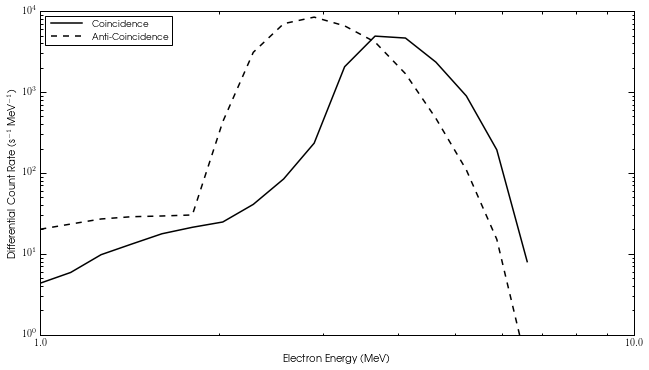

In [291]:
##########################################################################################
# Plot the differential count rate
figDiffCount, axDiffCount = plt.subplots(1,1)

plt.loglog(DCount.index/1000., DCount['DCount Coinc (s^-1 MeV^-1)'], 'k-', linewidth=1.5, label="Coincidence")
plt.loglog(DCount.index/1000., DCount['DCount Anti-Coinc (s^-1 MeV^-1)'], 'k--', linewidth=1.5, label="Anti-Coincidence")

# Figure Properties
axDiffCount.set_ylabel('Differential Count Rate (s$^{-1}$ MeV$^{-1}$)')  
axDiffCount.set_xlabel('Electron Energy (MeV)') 
axDiffCount.set_ylim(1E0, 1E4)
axDiffCount.set_xlim(1E0, 1E1)

from matplotlib.ticker import ScalarFormatter
axDiffCount.xaxis.set_major_formatter(ScalarFormatter())

axDiffCount.legend(loc='upper left',handlelength=4)

# Tight Layout
plt.tight_layout()

# Show the figure
plt.show(figDiffCount)